In [23]:
## Maddie Schwarz, Mindy Zuckerman, Hafiz Abdel, Aswayuja Koduri 
#4/21/2022  SES 598 Autonomous Exploration Systems

from osgeo import gdal, gdal_array
from osgeo import osr
import pandas as pd

import subprocess
import os

import numpy as np
import matplotlib.pyplot as plt

from osgeo import ogr
import geopandas as gpd 
from shapely.geometry import shape, Polygon
from centerline.geometry import Centerline

In [24]:
shapefile_name = "b1m_g30_KM2_poly.shp"

In [25]:
# Read the fault zone shapefile (a multi-polygon) using geopandas
# Display the attributes table

shapefile = gpd.read_file(shapefile_name)
print(shapefile)

    DN    Area                                           geometry
0  1.0  5812.0  POLYGON ((-12.33231 83.42529, 15.66769 83.4252...
1  0.0     NaN  POLYGON ((-76.33231 83.42529, -12.33231 83.425...


In [26]:
shapefile.geom_type

0    Polygon
1    Polygon
dtype: object

In [27]:
# extract row containing scarp polygon from df
# https://stackoverflow.com/questions/46307490/how-can-i-extract-the-nth-row-of-a-pandas-data-frame-as-a-pandas-data-frame

scarp = shapefile.iloc[[0]]
scarp
#scarp.geom_type

,DN,Area,geometry
0,1.0,5812.0,"POLYGON ((-12.33231 83.42529, 15.66769 83.4252..."


In [28]:
# save just the scarp as a new polygon shapefile
scarp.to_file('b1m_scarp_poly.shp')

In [29]:
scarp_shp = gpd.read_file("b1m_scarp_poly.shp")

scarp_geom = scarp['geometry']
scarp_geom
#type(scarp_geom)

0    POLYGON ((-12.33231 83.42529, 15.66769 83.4252...
Name: geometry, dtype: geometry

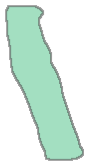

In [30]:
# access the shapely object stored in the geopandas datafram ('geometry' column)
# https://gis.stackexchange.com/questions/404299/how-to-convert-string-type-to-shapely-object

in_polygon = scarp_shp.geometry[0] 
in_polygon

In [31]:
# Check the data type of the polygon -- needs to be 'shapely' to input into centerline class
type(in_polygon)

shapely.geometry.polygon.Polygon

In [32]:
# get polygon coordinates
# upper edge of polygon is start: (15.667686462402344, 83.42528533935547)
# end:(60.667686462402344, -67.57471466064453),
in_polygon.exterior.coords[:-1]

[(-12.332313537597656, 83.42528533935547),
 (15.667686462402344, 83.42528533935547),
 (15.667686462402344, 82.42528533935547),
 (17.667686462402344, 82.42528533935547),
 (17.667686462402344, 81.42528533935547),
 (19.667686462402344, 81.42528533935547),
 (19.667686462402344, 80.42528533935547),
 (20.667686462402344, 80.42528533935547),
 (20.667686462402344, 79.42528533935547),
 (21.667686462402344, 79.42528533935547),
 (21.667686462402344, 78.42528533935547),
 (22.667686462402344, 78.42528533935547),
 (22.667686462402344, 75.42528533935547),
 (21.667686462402344, 75.42528533935547),
 (21.667686462402344, 74.42528533935547),
 (20.667686462402344, 74.42528533935547),
 (20.667686462402344, 72.42528533935547),
 (19.667686462402344, 72.42528533935547),
 (19.667686462402344, 71.42528533935547),
 (18.667686462402344, 71.42528533935547),
 (18.667686462402344, 64.42528533935547),
 (19.667686462402344, 64.42528533935547),
 (19.667686462402344, 61.42528533935547),
 (20.667686462402344, 61.42528533

### verified coordinates in QGIS ##

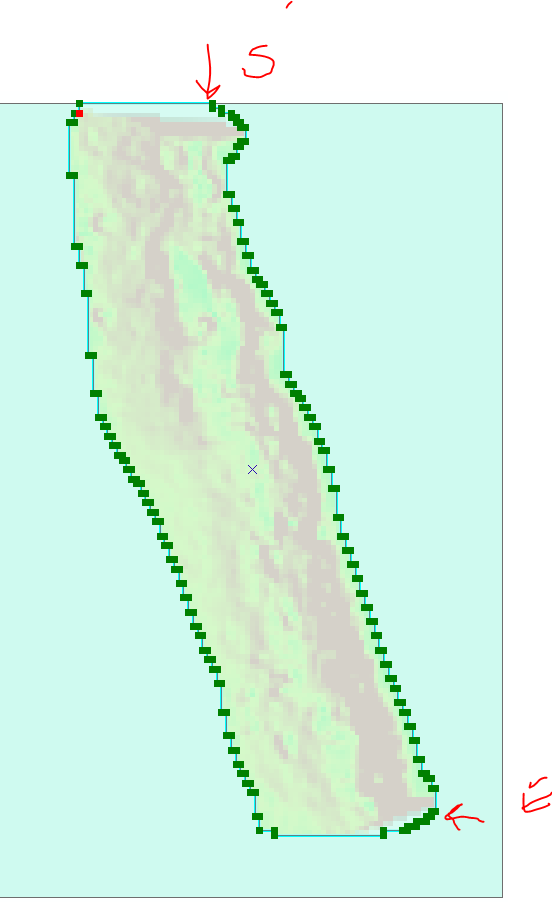

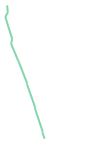

In [33]:
# compute centerline of scarp using centerline class 
# 2nd param is the interpolation distance

centerline = Centerline(in_polygon, 31)
centerline

In [34]:
# returns a multi-linestring
centerline.geom_type

'MultiLineString'

In [35]:
#list(centerline)

In [36]:
# Iterate through the multi-linestring to get the coordinates of each point
wpts_list = [list(x.coords) for x in list(centerline)]
wpts_list

[[(40.03725167979365, -55.95514944325323),
  (37.834353129069015, -49.71360354953342)],
 [(13.99853752623213, 21.431668318078877),
  (22.60427689899278, -0.6973757833056595)],
 [(7.653832558120229, 43.66961783305824),
  (0.7041103034619454, 65.90872904796473)],
 [(3.1813850925393297, 70.45039949460661),
  (0.7041103034619454, 65.90872904796473)],
 [(2.4900005119891198, 77.59470682695877),
  (3.1813850925393297, 70.45039949460661)],
 [(13.817999614803181, 21.56829160240349),
  (6.365528189021049, 39.267911238636046)],
 [(13.817999614803181, 21.56829160240349),
  (13.99853752623213, 21.431668318078877)],
 [(6.365528189021049, 39.267911238636046),
  (7.653832558120229, 43.66961783305824)],
 [(22.60427689899278, -0.6973757833056595),
  (22.41301356520608, -1.5198081185884575)],
 [(38.08976438448027, -48.8409484268783),
  (30.245608540324426, -25.308480894410764)],
 [(30.245608540324426, -25.308480894410764),
  (30.501019795735672, -24.435825771755646)],
 [(37.834353129069015, -49.713603549

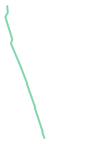

In [37]:
# merge into 1 linestring
from shapely.ops import linemerge
merged = linemerge(centerline)
merged

In [38]:
merged.geom_type

'LineString'

In [45]:
#Get coordinates of the final linestring
x,y = merged.coords.xy
df = pd.DataFrame(list(zip(x,y)), columns=['LAT', 'LON'])
df

,LAT,LON
0,40.037252,-55.955149
1,37.834353,-49.713604
2,38.089764,-48.840948
3,30.245609,-25.308481
4,30.501020,-24.435826
5,22.413014,-1.519808
6,22.604277,-0.697376
7,13.998538,21.431668
8,13.818000,21.568292
9,6.365528,39.267911


In [51]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.LAT, df.LON))
gdf.to_file("cnterlin_merg.shp")